In [1]:
from sklearn.cluster import KMeans
import numpy as n
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from time import time

In [57]:
n_colors=2

In [58]:
import cv2

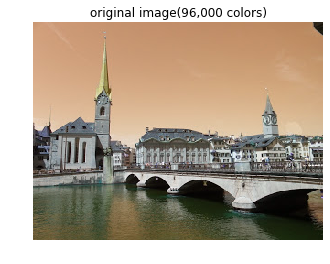

In [59]:
img=cv2.imread('C:\\Users\\shubham\\Downloads\\zurich.jpg')
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(1)
plt.axis("off")
plt.title('original image(96,000 colors)')
plt.imshow(img)
plt.show()

In [60]:
img.shape

(238, 317, 3)

In [61]:
img

array([[[201, 151, 115],
        [202, 152, 116],
        [202, 152, 116],
        ...,
        [ 43,  37,  26],
        [ 44,  38,  27],
        [ 45,  39,  28]],

       [[202, 152, 116],
        [202, 152, 116],
        [203, 153, 117],
        ...,
        [ 47,  40,  31],
        [ 44,  37,  28],
        [ 36,  31,  22]],

       [[202, 152, 116],
        [203, 153, 117],
        [203, 153, 117],
        ...,
        [ 34,  27,  18],
        [ 26,  21,  12],
        [ 22,  17,   8]],

       ...,

       [[102,  88,  52],
        [105,  91,  55],
        [105,  91,  55],
        ...,
        [ 19,  30,  10],
        [ 19,  30,  10],
        [ 19,  30,  10]],

       [[100,  84,  47],
        [ 93,  77,  40],
        [100,  84,  47],
        ...,
        [ 21,  30,  10],
        [ 21,  30,  10],
        [ 22,  31,  11]],

       [[114,  95,  58],
        [111,  92,  55],
        [118, 100,  63],
        ...,
        [ 21,  30,  10],
        [ 22,  31,  11],
        [ 23,  32,  12]]

In [62]:
img=img/255.0

In [63]:
img

array([[[0.78823529, 0.59215686, 0.45098039],
        [0.79215686, 0.59607843, 0.45490196],
        [0.79215686, 0.59607843, 0.45490196],
        ...,
        [0.16862745, 0.14509804, 0.10196078],
        [0.17254902, 0.14901961, 0.10588235],
        [0.17647059, 0.15294118, 0.10980392]],

       [[0.79215686, 0.59607843, 0.45490196],
        [0.79215686, 0.59607843, 0.45490196],
        [0.79607843, 0.6       , 0.45882353],
        ...,
        [0.18431373, 0.15686275, 0.12156863],
        [0.17254902, 0.14509804, 0.10980392],
        [0.14117647, 0.12156863, 0.08627451]],

       [[0.79215686, 0.59607843, 0.45490196],
        [0.79607843, 0.6       , 0.45882353],
        [0.79607843, 0.6       , 0.45882353],
        ...,
        [0.13333333, 0.10588235, 0.07058824],
        [0.10196078, 0.08235294, 0.04705882],
        [0.08627451, 0.06666667, 0.03137255]],

       ...,

       [[0.4       , 0.34509804, 0.20392157],
        [0.41176471, 0.35686275, 0.21568627],
        [0.41176471, 0

In [64]:
w,h,d=img.shape                               #3d to 2d image combining w and h as kmeans take 2d image not 3d
image_array=img.reshape(w*h,d)

In [65]:
image_array.shape

(75446, 3)

In [66]:
#fitting model on a small sub sample of complete image
t0=time()
image_array_sample=shuffle(image_array,random_state=0)[:1000]
#from first 1000 pixels picked and shuffled them
kmeans=KMeans(n_clusters=n_colors,random_state=0).fit(image_array_sample)
print("done in %0.3fs "%(time()-t0))

done in 0.050s 


In [67]:
#get labels for all centroids
t0=time()
labels=kmeans.predict(image_array)
labels

array([1, 1, 1, ..., 0, 0, 0])

In [68]:
print(kmeans.cluster_centers_)

[[0.28157074 0.28593626 0.23015697]
 [0.78413916 0.65315627 0.5333271 ]]


In [69]:
print(kmeans.cluster_centers_.shape[1])
print("done in %0.3fs "%(time()-t0))

3
done in 0.745s 


In [70]:
#recreat the whole image according to the labels and each pixel
def recreat_image(c,labels,w,h,d):
    image=n.zeros((w,h,d))
    label_idx=0
    #now label each pixel accrding to limited labels
    for i in range(w):
        for j in range(h):
            image[i][j]=c[labels[label_idx]]
            label_idx +=1
    print(label_idx)
    return image


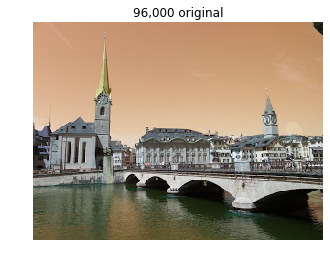

75446


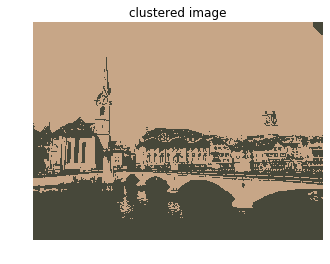

In [71]:
plt.figure(1)
plt.axis('off')
plt.title('96,000 original')
plt.imshow(img)
plt.show()
plt.figure(2)
plt.axis('off')
plt.title('clustered image')
plt.imshow(recreat_image(kmeans.cluster_centers_,labels,w,h,d))
plt.show()

In [72]:
labels[100]

1